In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path

2024-04-04 13:33:10.062233: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 13:33:14.021755: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
save_path = Path("variance_obs")
save_path_no = Path("variance_no_obs")

seeds = np.arange(10)

train_average_cost_improvement = []
train_average_min_diff = []

var_average_cost_improvement_rein = []
var_average_cost_improvement_rein_no_obs = []

var_average_min_diff_rein = []
var_average_min_diff_rein_no_obs = []

var_average_min_diff = []
var_average_min_diff_no_obs = []


var_average_cost_improvement = []
var_average_cost_improvement_no_obs = []


var_average_gradient = []
var_average_gradient_normal = []

var_average_variance_exps = []
var_average_variance_exps_normal = []

var_average_variance_trajs = []
var_average_variance_trajs_normal = []

for seed in seeds:
    with open(save_path / f"train_average_cost_improvement_seed{seed}.npy", "rb") as f:
        train_average_cost_improvement.append(np.load(f))
    
    with open(save_path / f"train_average_min_diff_seed{seed}.npy", "rb") as f:
        train_average_min_diff.append(np.load(f))

    with open(save_path / f"var_average_cost_improvement_rein_seed{seed}.npy", "rb") as f:
        var_average_cost_improvement_rein.append(np.load(f))
    
    with open(save_path / f"var_average_min_diff_rein_seed{seed}.npy", "rb") as f:
        var_average_min_diff_rein.append(np.load(f))
    
    with open(save_path / f"var_average_min_diff_seed{seed}.npy", "rb") as f:
        var_average_min_diff.append(np.load(f))
    
    with open(save_path / f"var_average_cost_improvement_seed{seed}.npy", "rb") as f:
        var_average_cost_improvement.append(np.load(f))

    with open(save_path / f"var_average_gradient_seed{seed}.npy", "rb") as f:
        var_average_gradient.append(np.load(f))

    with open(save_path / f"var_average_gradient_normal_seed{seed}.npy", "rb") as f:
        var_average_gradient_normal.append(np.load(f))

    with open(save_path / f"var_average_variance_exps_seed{seed}.npy", "rb") as f:
        var_average_variance_exps.append(np.load(f))

    with open(save_path / f"var_average_variance_exps_normal_seed{seed}.npy", "rb") as f:
        var_average_variance_exps_normal.append(np.load(f))

    with open(save_path / f"var_average_variance_trajs_seed{seed}.npy", "rb") as f:
        var_average_variance_trajs.append(np.load(f))

    with open(save_path / f"var_average_variance_trajs_normal_seed{seed}.npy", "rb") as f:
        var_average_variance_trajs_normal.append(np.load(f))



    with open(save_path_no / f"var_average_cost_improvement_rein_seed{seed}.npy", "rb") as f:
        var_average_cost_improvement_rein_no_obs.append(np.load(f))
    
    with open(save_path_no / f"var_average_min_diff_rein_seed{seed}.npy", "rb") as f:
        var_average_min_diff_rein_no_obs.append(np.load(f))
    
    with open(save_path_no / f"var_average_min_diff_seed{seed}.npy", "rb") as f:
        var_average_min_diff_no_obs.append(np.load(f))
    
    with open(save_path_no / f"var_average_cost_improvement_seed{seed}.npy", "rb") as f:
        var_average_cost_improvement_no_obs.append(np.load(f))

    


train_average_cost_improvement = np.array(train_average_cost_improvement)
train_average_min_diff = np.array(train_average_min_diff)

var_average_min_diff = np.array(var_average_min_diff)
var_average_cost_improvement = np.array(var_average_cost_improvement)

var_average_gradient = np.array(var_average_gradient)
var_average_gradient_normal = np.array(var_average_gradient_normal)

var_average_variance_exps = np.array(var_average_variance_exps)
var_average_variance_exps_normal = np.array(var_average_variance_exps_normal)

var_average_variance_trajs = np.array(var_average_variance_trajs)
var_average_variance_trajs_normal = np.array(var_average_variance_trajs_normal)

var_average_cost_improvement_rein = np.array(var_average_cost_improvement_rein)
var_average_min_diff_rein = np.array(var_average_min_diff_rein)

var_average_cost_improvement_rein_no_obs = np.array(var_average_cost_improvement_rein_no_obs)
var_average_min_diff_rein_no_obs = np.array(var_average_min_diff_rein_no_obs)

In [3]:
norm_average_grad = np.linalg.norm(var_average_gradient, axis=2)
norm_average_grad_normal = np.linalg.norm(var_average_gradient_normal, axis=2)

In [4]:
def plot_mean_std_nice(x_axis, y_list, label_list = None, ylim=(None, None), title="", x_label="episode", ylabel=""):
    if not label_list:
        label_list = [""]*len(y_list)
    for i, y in enumerate(y_list):
        mean = np.mean(y, axis=0)
        std = np.std(y, axis=0)
        plt.plot(x_axis, mean, label=label_list[i])
        plt.fill_between(x_axis, mean - std, mean + std, alpha=0.2)
    plt.ylim(ylim)
    plt.grid()
    plt.legend()
    plt.ylabel(ylabel)
    plt.xlabel(x_label)
    plt.title(title)
    plt.show()
    

# PLot training progress all

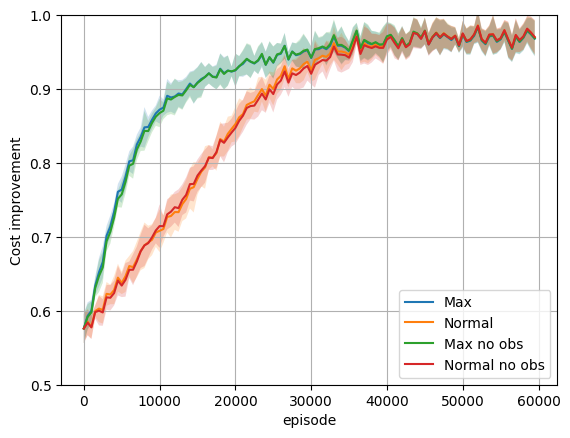

In [5]:
x_axis=np.arange(0,60000, 500)
plot_mean_std_nice(x_axis, [var_average_cost_improvement, var_average_cost_improvement_rein, 
                           var_average_cost_improvement_no_obs,  var_average_cost_improvement_rein_no_obs, ], 
                   label_list=["Max", "Normal", "Max no obs", "Normal no obs"],
                   ylim=(0.5, 1), ylabel="Cost improvement")

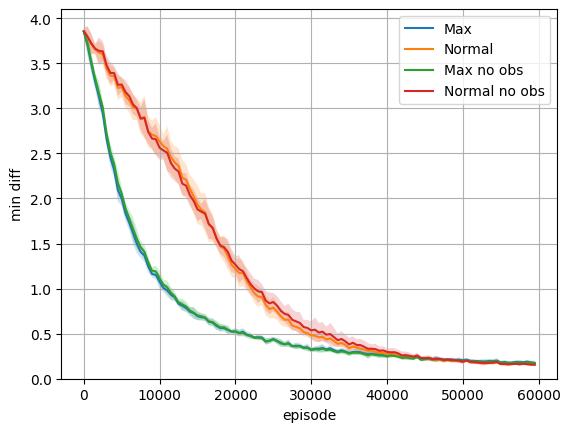

In [6]:
plot_mean_std_nice(x_axis, [var_average_min_diff, var_average_min_diff_rein,
                            var_average_min_diff_no_obs, var_average_min_diff_rein_no_obs], 
                     label_list=["Max", "Normal", "Max no obs", "Normal no obs"],
                   ylabel="min diff", ylim=(0., 4.1))

# Plot Training progress

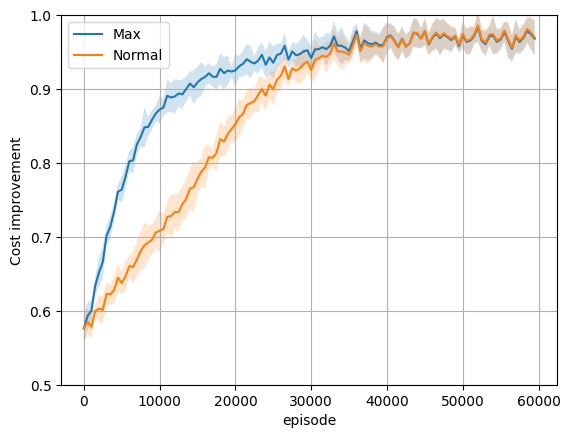

In [7]:
x_axis=np.arange(0,60000, 500)
plot_mean_std_nice(x_axis, [var_average_cost_improvement, var_average_cost_improvement_rein], 
                   label_list=["Max", "Normal"],
                   ylim=(0.5, 1), ylabel="Cost improvement")

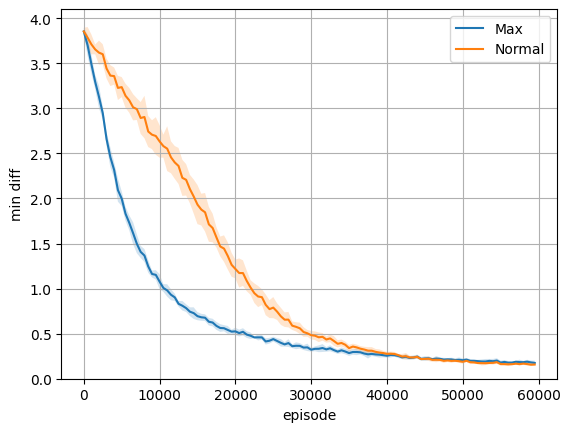

In [8]:
plot_mean_std_nice(x_axis, [var_average_min_diff, var_average_min_diff_rein], 
                     label_list=["Max", "Normal"],
                   ylabel="min diff", ylim=(0., 4.1))

# Plot variances trajectories

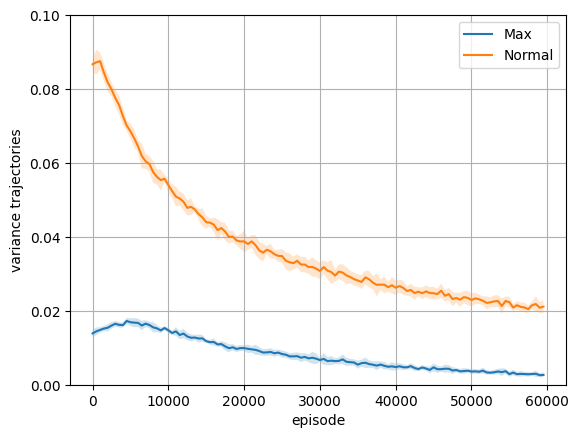

In [11]:
plot_mean_std_nice(x_axis, [var_average_variance_trajs, var_average_variance_trajs_normal], 
                   label_list=["Max", "Normal"],
                   ylim=(0., 0.1), ylabel="variance trajectories")

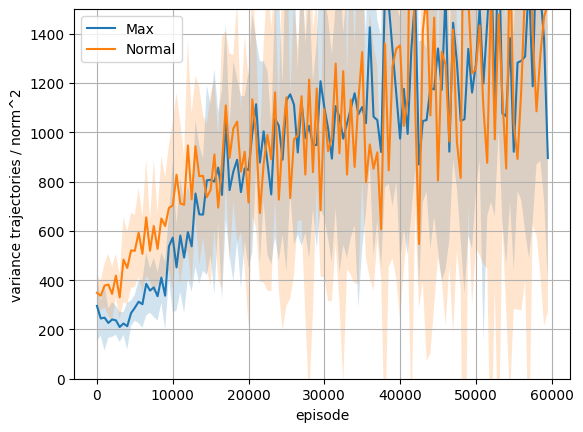

In [12]:
plot_mean_std_nice(x_axis, [var_average_variance_trajs/(norm_average_grad**2), var_average_variance_trajs_normal/(norm_average_grad_normal**2)], 
                   label_list=["Max", "Normal"], ylim=(0, 1500),
                   ylabel="variance trajectories / norm^2")

# Plot norms

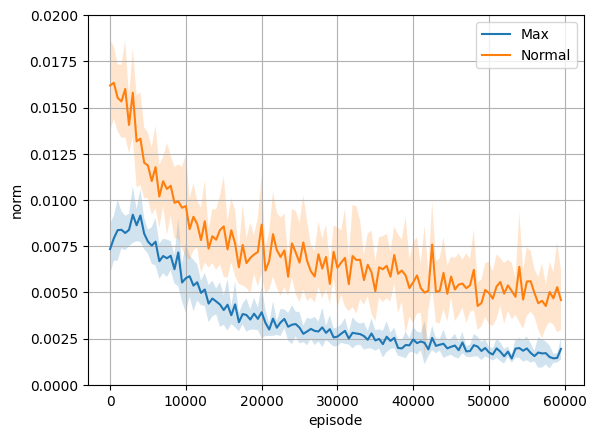

In [13]:
plot_mean_std_nice(x_axis, [norm_average_grad, norm_average_grad_normal], 
                   label_list=["Max", "Normal"], ylim=(0, 0.02),
                   ylabel="norm")

# Plot scalar product

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


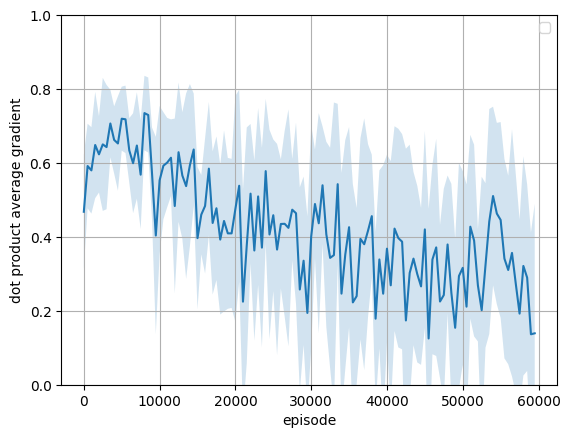

In [14]:
dot_prod = np.array([[np.dot(g / np.linalg.norm(g), g_n / np.linalg.norm(g_n)) for g, g_n in zip(grads, grads_normal)] 
                     for grads, grads_normal in zip(var_average_gradient, var_average_gradient_normal)])

plot_mean_std_nice(x_axis, [dot_prod,], ylim=(0, 1),
                   ylabel="dot product average gradient")